In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 17

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 17)                  │             187 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,257 (4.91 KB)

 Trainable params: 1,257 (4.91 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0938 - loss: 3.0010
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0539 - loss: 2.9823 - val_accuracy: 0.0581 - val_loss: 2.8832
Epoch 2/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0156 - loss: 2.9330
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0386 - loss: 2.8958 - val_accuracy: 0.0410 - val_loss: 2.8558
Epoch 3/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0703 - loss: 2.8497
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0667 - loss: 2.8695 - val_accuracy: 0.0564 - val_loss: 2.8360
Epoch 4/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0469 - loss: 2.8523
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7147 - loss: 0.8966


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[3.1143930e-04 7.5903376e-15 7.7123749e-03 1.1237190e-07 9.8641021e-07
 1.1088794e-10 3.7374666e-01 3.8158827e-02 4.8264869e-08 2.7315318e-05
 3.0539163e-14 1.7353670e-05 4.4890032e-05 3.1681896e-06 8.6323079e-03
 2.0358916e-01 3.6775535e-01]
6


# 混同行列

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


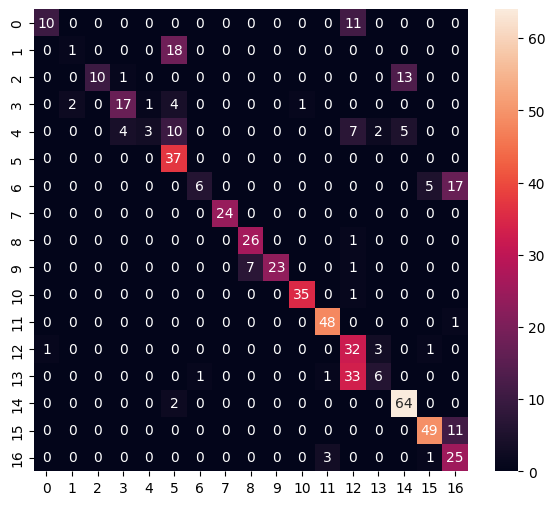

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.48      0.62        21
           1       0.33      0.05      0.09        19
           2       1.00      0.42      0.59        24
           3       0.77      0.68      0.72        25
           4       0.75      0.10      0.17        31
           5       0.52      1.00      0.69        37
           6       0.86      0.21      0.34        28
           7       1.00      1.00      1.00        24
           8       0.79      0.96      0.87        27
           9       1.00      0.74      0.85        31
          10       0.97      0.97      0.97        36
          11       0.92      0.98      0.95        49
          12       0.37      0.86      0.52        37
          13       0.55      0.15      0.23        41
          14       0.78      0.97      0.86        66
          15       0.88      0.82      0.84        60
          16       0.46      0.86      0.60        29

    

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmpng1kvszd\assets


INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmpng1kvszd\assets


Saved artifact at 'C:\Users\kenjl\AppData\Local\Temp\tmpng1kvszd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  1757914220112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1757914228176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1757914227984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1757914218960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1758673567184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1758673566224: TensorSpec(shape=(), dtype=tf.resource, name=None)


7128

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.11439449e-04 7.59040962e-15 7.71238049e-03 1.12372007e-07
 9.86410214e-07 1.10888354e-10 3.73746663e-01 3.81588377e-02
 4.82650044e-08 2.73153710e-05 3.05392749e-14 1.73536864e-05
 4.48900719e-05 3.16819569e-06 8.63231439e-03 2.03589067e-01
 3.67755353e-01]
6
